#                 COVID-19 Live Data Scraping From Worldometer.info

<p>Despite incredible efforts by scientists around the world, there is still much we do not understand, and we are all now part of a planet-wide experiment trying to find answers.
Here are some of the big outstanding questions.
It is one of the most basic questions, but also one of the most crucial.

There have been hundreds of thousands of confirmed cases around the world, but this is only a fraction of the total number of infections. And the figures are further confused by an unknown number of asymptomatic cases - people who have the virus but don't feel ill.

Developing an antibody test will allow researchers to see whether anyone has had the virus. Only then will we understand how far or how easily the coronavirus is spreading.

In this Notebook I am scraping the coronavirus spreading data from worldometer.info </p>

### Install all the required Library
<li>BeautifulSoup</li>
<li>Pandas</li>
<li>Numpy</li>
<li>Matplotlib</li>

### Importing All the Library

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("All the Library has been Installed")

All the Library has been Installed


In [2]:
my_url = "https://www.worldometers.info/coronavirus/"
html = requests.get(my_url)

In [3]:
soup = BeautifulSoup(html.content, "html5lib")
soup_for_last_update_time = BeautifulSoup(html.content, "html5lib")

In [4]:
for_time = soup_for_last_update_time.findAll("div",{"class":"content-inner"})
last_updated_time = for_time[0].findAll('div')[1].text
table = soup.tbody.findAll("tr")

In [5]:
single_contry_info = []
for row in table:
    country_data_list = []
    country_info = row.findAll("td")
    for value in country_info:
        country_data = value.text.strip().replace(",","")
        if (country_data ==''):
            country_data  = 0
        country_data_list.append(country_data)
    country_data_list
    single_contry_info.append(country_data_list)
header = ["country", "total_cases", "new_cases", "total_deaths", "new_deaths", "total_recovered", "active_cases",
          "serious_condition","total_cases_per1mpop", "total_death_per1mpop","1st_case" ]
df = pd.DataFrame(np.array(single_contry_info), columns = header)

### Adding a death Rate columns
<p>Death Rate(%) = (Total Death/Total Infected Cases)*100</p>

In [6]:
cols = df.columns.drop(["country","1st_case"])
df[cols] = df[cols].apply(pd.to_numeric)
df["death_rate"]=df['total_deaths']/df['total_cases']*100

In [7]:
global_coronavirus_cases = df.total_cases.sum()
global_active_cases = df.active_cases.sum()
global_total_death = df.total_deaths.sum()
global_recovered = df.total_recovered.sum()
global_data_for_pi = [global_active_cases, global_recovered, global_total_death]
global_label_for_pi = ['Active Cases', "Total Recovered", "Total Death"]

In [8]:
global_data_sum = df.sum().drop(["country","death_rate","1st_case"])
global_data = pd.DataFrame(global_data_sum).transpose()
global_data.insert(loc=0, column = 'country', value = 'Global')
global_data.insert(loc=10, column = '1st_case', value = 'None')
global_data.insert(loc=11, column = 'death_rate', value = (global_data['total_deaths'][0]/global_data['total_cases'][0]*100))

### Creating a dataframe for top 10 country infected coronavirus 

In [9]:
df_sorted = df.sort_values(by = 'total_cases', ascending = False)
df_top_10_country = df_sorted.head(10)
df_top_10_country

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_condition,total_cases_per1mpop,total_death_per1mpop,1st_case,death_rate
0,USA,142793,333,2490,6,4562,135741,2970,431.0,8.0,Jan 20,1.743783
1,Italy,97689,0,10779,0,13030,73880,3906,1616.0,178.0,Jan 29,11.033996
2,Spain,85195,5085,7340,537,16780,61075,5231,1822.0,157.0,Jan 30,8.615529
200,China,81470,31,3304,4,75700,2466,633,57.0,2.0,Jan 10,4.055481
3,Germany,63929,1494,560,19,9211,54158,1979,763.0,7.0,Jan 26,0.875972
4,Iran,41495,3186,2757,117,13911,24827,3511,494.0,33.0,Feb 18,6.644174
5,France,40174,0,2606,0,7202,30366,4632,615.0,40.0,Jan 23,6.486782
6,UK,19522,0,1228,0,135,18159,163,288.0,18.0,Jan 30,6.290339
7,Switzerland,15526,697,333,33,1823,13370,301,1794.0,38.0,Feb 24,2.144789
8,Belgium,11899,1063,513,82,1527,9859,927,1027.0,44.0,Feb 03,4.311287


### Creating a dataframe for top 20 country by death rate

In [10]:
df_top20_as_per_death_rate = df.sort_values(by ='death_rate', ascending=False).head(20)

### Creating a dataframe for top 10 country by new cases

In [11]:
df_new_sort_by_new_cases = df.sort_values(by = 'new_cases', ascending = False)
df_new_case_in_top10_country = df_new_sort_by_new_cases.head(10)

### Pie Chrat of Global Data of Active Cases, Recovered, Death

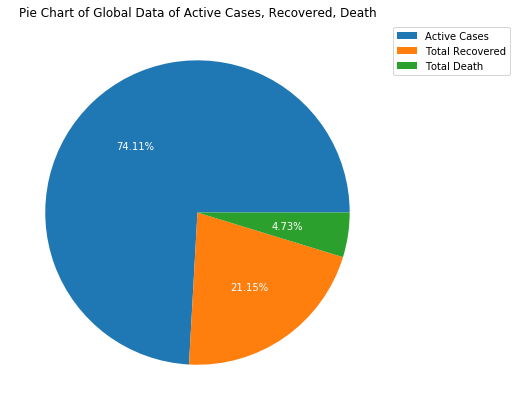

,0
country,Global
total_cases,740239
new_cases,17880
total_deaths,35035
new_deaths,1069
total_recovered,156588
active_cases,548616
serious_condition,28471
total_cases_per1mpop,61337.3
total_death_per1mpop,1693.98


In [12]:
fig1, ax1 = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))
wedges, texts,  autotexts = ax1.pie(global_data_for_pi, autopct='%1.2f%%', textprops=dict(color="w"))
ax1.legend(wedges, global_label_for_pi,
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title('Pie Chart of Global Data of Active Cases, Recovered, Death')
plt.show()
global_data.transpose()

### Bar Chart of Active Cases, Recovered, Death of top 10 country

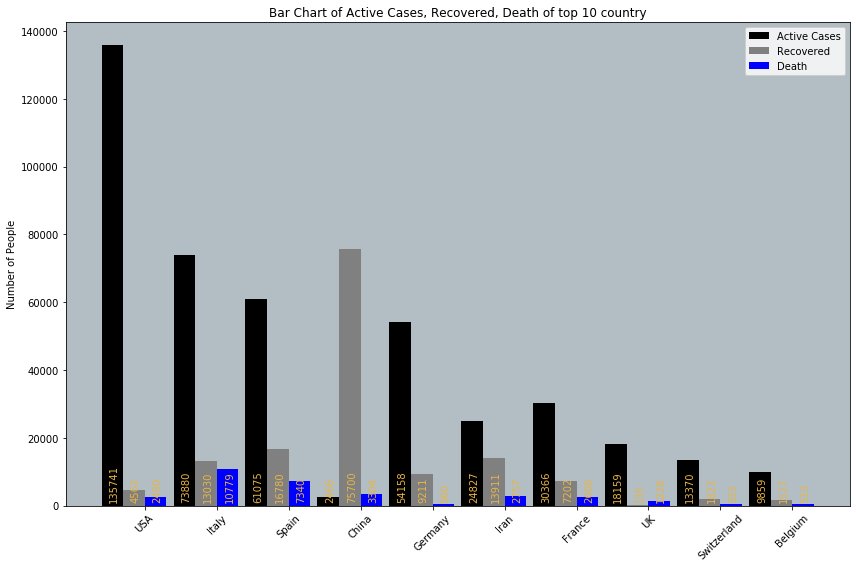

In [13]:
x1 = np.arange(len((df_top_10_country['country'])))  # the label locations
width = 0.3  # the width of the bars
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.set_facecolor('#b2bec3')
rects1 = ax2.bar(x1 - width- width/2, df_top_10_country['active_cases'], width, facecolor = 'Black', label='Active Cases')
rects2 = ax2.bar(x1 - width/2 ,df_top_10_country['total_recovered'], width, facecolor = 'gray', label='Recovered')
rects3 = ax2.bar(x1 + width/2,df_top_10_country['total_deaths'], width, facecolor = 'blue', label='Death')
ax2.set_ylabel('Number of People')
ax2.set_title('Bar Chart of Active Cases, Recovered, Death of top 10 country')
ax2.set_xticks(x1)
ax2.set_xticklabels(df_top_10_country['country'], rotation = 45)
ax2.legend()
def autolabel_1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 0),
                    xytext=(2, 3),
                    textcoords="offset points",
                    rotation = 90,
                    color = '#EAB543',
                    ha='center', va='bottom')
autolabel_1(rects1)
autolabel_1(rects2)
autolabel_1(rects3)
fig2.tight_layout()

### Bar Chart of Top 20 country by Death rate(%)

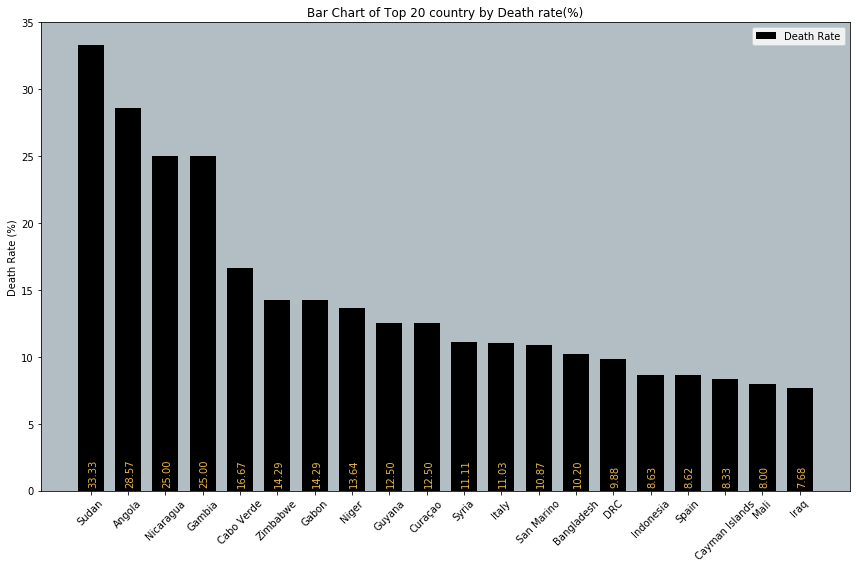

In [14]:
x2 = np.arange(len((df_top20_as_per_death_rate['country'])))  # the label locations
width = .7  # the width of the bars
fig3, ax3 = plt.subplots(figsize=(12,8))
ax3.set_facecolor('#b2bec3')
rects4 = ax3.bar(x2, df_top20_as_per_death_rate['death_rate'], width, facecolor = 'Black', label='Death Rate')
ax3.set_ylabel('Death Rate (%)')
ax3.set_title('Bar Chart of Top 20 country by Death rate(%)')
ax3.set_xticks(x2)
ax3.set_xticklabels(df_top20_as_per_death_rate['country'], rotation = 45)
ax3.legend()
def autolabel_2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax3.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 0),
                    xytext=(2, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    rotation = 90,
                    color = '#EAB543',
                    ha='center', va='bottom')
autolabel_2(rects4)
fig3.tight_layout()

### Bar Chart of New Cases, New Death by top 10 ountry

,2,4,3,8,9,7,11,13,0,19
country,Spain,Iran,Germany,Belgium,Netherlands,Switzerland,Austria,Portugal,USA,Sweden
new_cases,5085,3186,1494,1063,884,697,589,446,333,328
new_deaths,537,117,19,82,93,33,22,21,6,36
death_rate,8.61553,6.64417,0.875972,4.31129,7.35319,2.14479,1.15175,2.18477,1.74378,3.62463


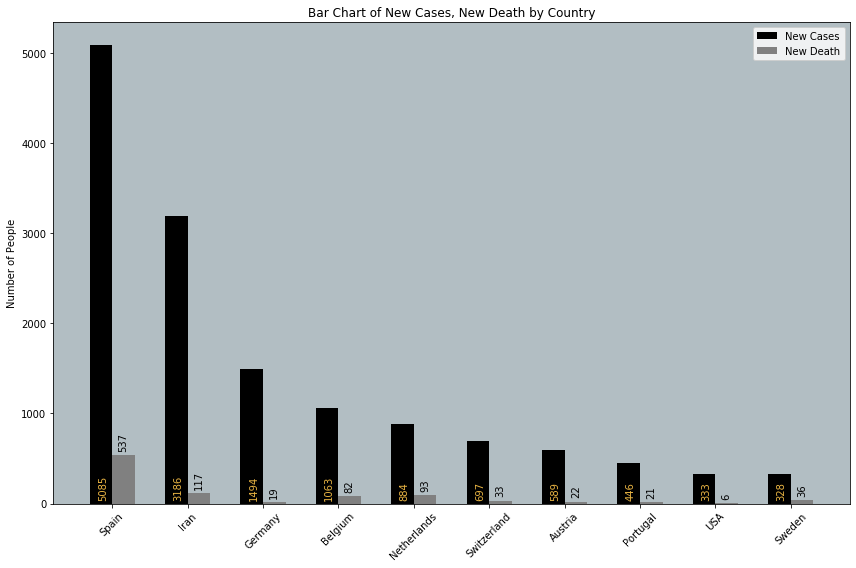

In [15]:
x3 = np.arange(len((df_new_case_in_top10_country['country'])))
width = 0.3
fig4, ax4 = plt.subplots(figsize=(12,8))
ax4.set_facecolor('#b2bec3')
rects5 = ax4.bar(x3 - width/2, df_new_case_in_top10_country['new_cases'], width, facecolor = 'Black', label='New Cases')
rects6 = ax4.bar(x3 + width/2 ,df_new_case_in_top10_country['new_deaths'], width, facecolor = 'gray', label='New Death')
ax4.set_ylabel('Number of People')
ax4.set_title('Bar Chart of New Cases, New Death by Country')
ax4.set_xticks(x3)
ax4.set_xticklabels(df_new_case_in_top10_country['country'], rotation = 45)
ax4.legend()
def autolabel_for_new_cases(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax4.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 0),
                    xytext=(2, 3),
                    textcoords="offset points",
                    rotation = 90,
                    color = '#EAB543',
                    ha='center', va='bottom')
def autolabel_for_new_death(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax4.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height+10),
                    xytext=(0, 3),
                    textcoords="offset points",
                    rotation = 90,
                    color = 'black',
                    ha='center', va='bottom')
autolabel_for_new_cases(rects5)
autolabel_for_new_death(rects6)
fig4.tight_layout()
df_new_case_in_top10_country[['country','new_cases','new_deaths','death_rate']].transpose()

### Saving the Data in a csv file

In [16]:
csv_file_name = last_updated_time.lstrip("Last updated: ").replace(" ", "_").replace(",", "_").replace(":", "_") + ".csv"
df.to_csv(csv_file_name)

### Display the data of Your Own Country by entering country name

In [17]:
#country_name = input()
df[df['country'] == 'India'].transpose()

,39
country,India
total_cases,1071
new_cases,47
total_deaths,29
new_deaths,2
total_recovered,100
active_cases,942
serious_condition,0
total_cases_per1mpop,0.8
total_death_per1mpop,0.02


### Use this Notebook as a Adafruit Client for Display 

#### Install adafruit library

#### Importing Adafruit Library

In [18]:
from Adafruit_IO import Client
aio = Client("yobots", "83a80786ecc642919bcff59eb15548c2")

### I am sending top 10 country, global and my country Data

In [19]:
df_top_10_country = df_top_10_country.append(global_data, ignore_index=True)
df_top_10_country=df_top_10_country.append(df[df['country'] == 'India'],ignore_index=True)

In [20]:
from time import sleep
for country in df_top_10_country['country']:
    country_pos = pd.Index(list(df_top_10_country.country))
    df_transpose = df_top_10_country[df_top_10_country["country"]==country].transpose()
    df_transpose.columns = ['Data']
    data_for_send = str(country_pos.get_loc(country)+1)+"_"+str(df_transpose['Data'][0])+"_"+str(df_transpose['Data'][1])+"_"+str(df_transpose['Data'][2])+"_"+str(df_transpose['Data'][3])+"_"+str(df_transpose['Data'][4])+"_"+str(df_transpose['Data'][5])+"_"+str(df_transpose['Data'][6])+"_"+str('{0:.2f}'.format(df_transpose['Data'][11]))
    aio.send('covid-19', data_for_send)
    aio.send('last-updated-time', last_updated_time)
    sleep(1)
    print(df_transpose)
    print(data_for_send)

                         Data
country                   USA
total_cases            142793
new_cases                 333
total_deaths             2490
new_deaths                  6
total_recovered          4562
active_cases           135741
serious_condition        2970
total_cases_per1mpop      431
total_death_per1mpop        8
1st_case               Jan 20
death_rate            1.74378
1_USA_142793_333_2490_6_4562_135741_1.74
                        Data
country                Italy
total_cases            97689
new_cases                  0
total_deaths           10779
new_deaths                 0
total_recovered        13030
active_cases           73880
serious_condition       3906
total_cases_per1mpop    1616
total_death_per1mpop     178
1st_case              Jan 29
death_rate            11.034
2_Italy_97689_0_10779_0_13030_73880_11.03
                         Data
country                 Spain
total_cases             85195
new_cases                5085
total_deaths             7340
